In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
data = pd.read_csv("..\Data\data.csv")

In [3]:
# Display basic info and summary
print(data.info())
print(data.describe())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000  

In [4]:
print(data.isnull().sum())
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


np.int64(1)

In [5]:
# Drop freatures with lower correlations
correlation = data.corr()
correlation['fail'].sort_values(ascending=False)
for feature, value in correlation['fail'].items():
    if value < 0.05 and value > -0.1: 
        print(feature, value)
        data.drop(columns=feature, inplace=True)

footfall -0.07306605085446076
tempMode -0.014461822401971953
CS 0.018854931649457132


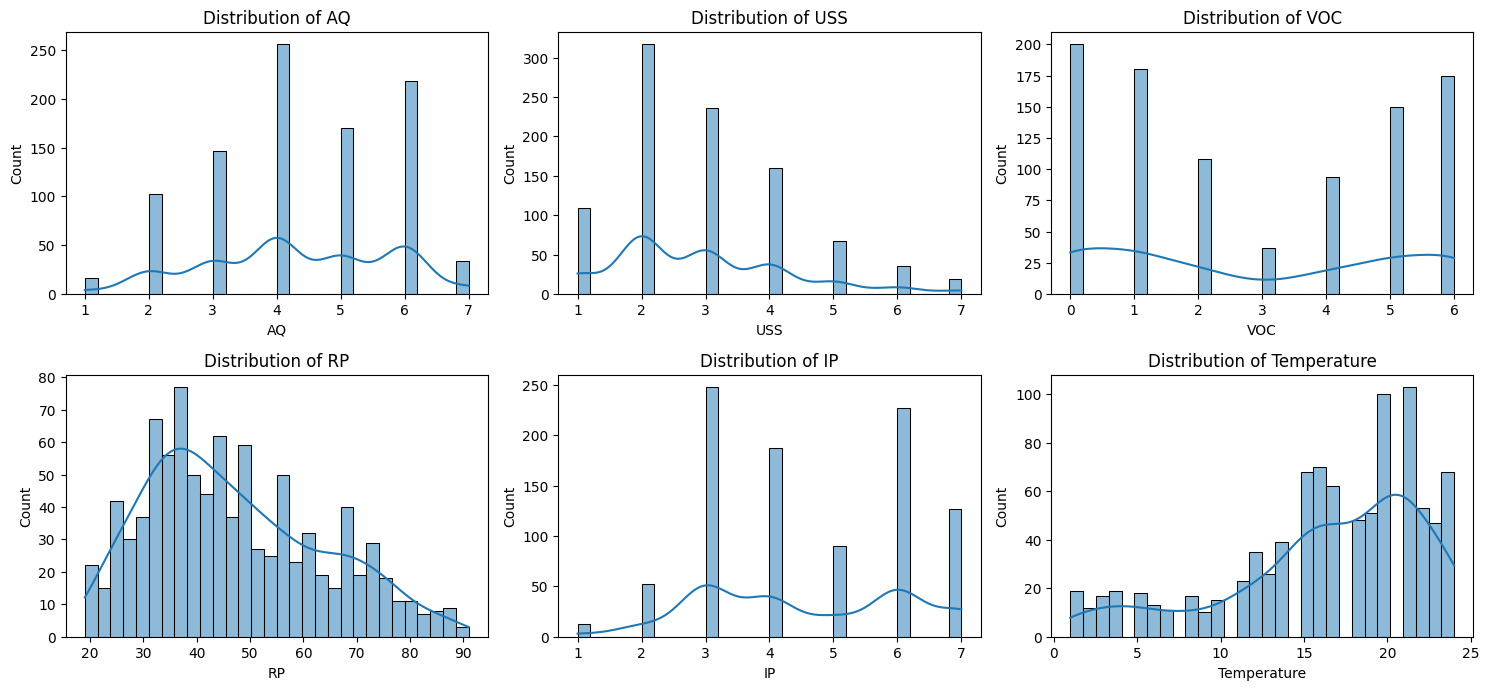

In [6]:
plt.figure(figsize=(15, 10))
features = ['AQ', 'USS', 'VOC', 'RP', 'IP', 'Temperature']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

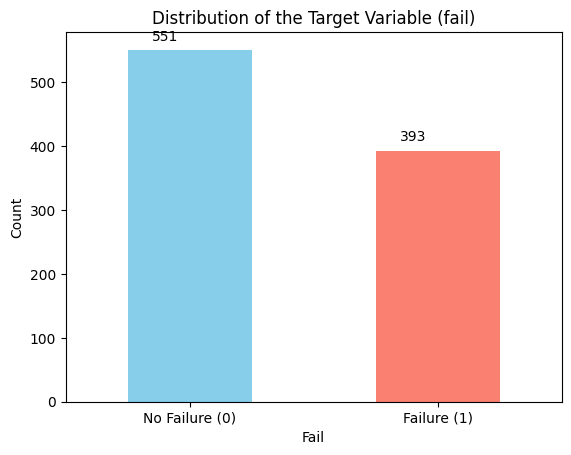

In [7]:
bar=data['fail'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of the Target Variable (fail)')
plt.xlabel('Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'], rotation=0)
for bar in bar.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10, 
             f'{int(bar.get_height())}', ha='center', va='bottom')
plt.show()

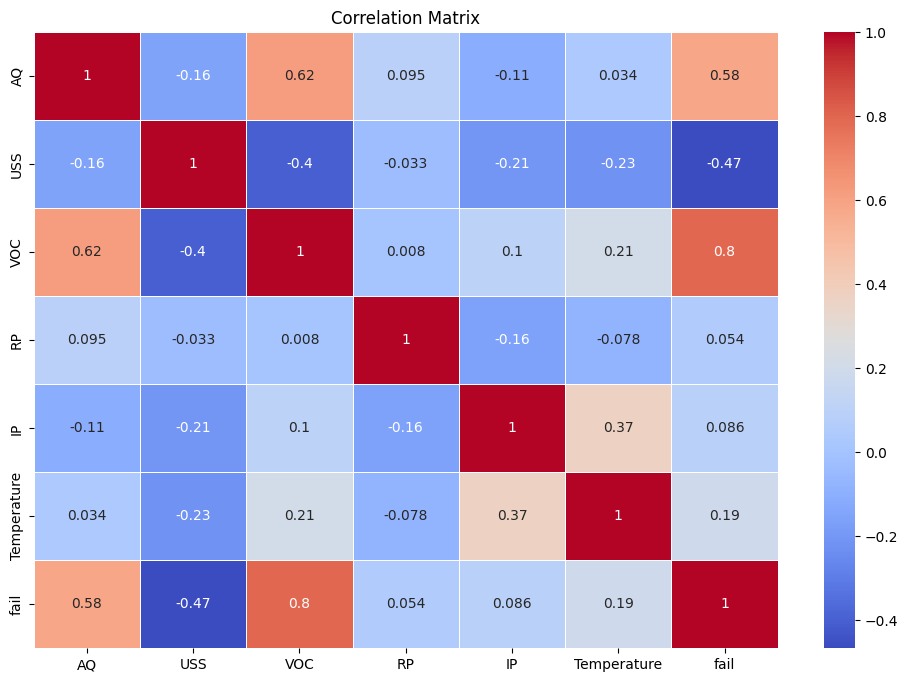

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Correlation Heatmap
corr = data.corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale='Viridis')
fig.update_layout(title_text='Correlation Heatmap', title_font=dict(size=25), title_x=0.5)
fig.show()

In [10]:
print(data)

     AQ  USS  VOC  RP  IP  Temperature  fail
0     7    1    6  36   3            1     1
1     3    3    1  20   4            1     0
2     2    2    1  24   6            1     0
3     3    4    1  28   6            1     0
4     5    6    0  68   6            1     0
..   ..  ...  ...  ..  ..          ...   ...
939   7    1    4  73   6           24     1
940   5    2    6  50   6           24     1
941   6    2    5  43   6           24     1
942   6    2    6  46   7           24     1
943   4    2    3  61   7           24     1

[944 rows x 7 columns]


In [11]:
data.to_csv('../Data/data_cleaned.csv', index=False)